In [59]:
import numpy as np
import pandas as pd
import seaborn as sns

In [60]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [61]:
df = df[['total_bill','tip','size']]

In [62]:
cov_matrix = df.cov()
print(cov_matrix)

            total_bill       tip      size
total_bill   79.252939  8.323502  5.065983
tip           8.323502  1.914455  0.643906
size          5.065983  0.643906  0.904591


In [63]:
np_cov = cov_matrix.to_numpy()

In [64]:
""" 
 REMEMBER
 calculation of eigen value and eigen vectors
"""
eigen_values, eigen_vectors =  np.linalg.eig(cov_matrix)
print(eigen_values,eigen_vectors)

[80.46625221  1.05159637  0.55413551] [[-0.99233642 -0.11707214 -0.03952889]
 [-0.10567486  0.96986065 -0.21955216]
 [-0.06404095  0.21369239  0.97479963]]


In [65]:
""" 
 REMEMBER
 How to sort based on indexes
"""
sorted_index = eigen_values.argsort()[::-1]
eigen_values = eigen_values[sorted_index]
eigen_vectors = eigen_vectors[sorted_index]

In [66]:
# converting data to mean adjusted data

cols = ['total_bill','tip','size']
for col in cols:
    curr_mean = df[col].mean()
    df[col] = df.apply(lambda rec : rec[col] - curr_mean , axis = 1)
df.head()

,total_bill,tip,size
0,-2.795943,-1.988279,-0.569672
1,-9.445943,-1.338279,0.430328
2,1.224057,0.501721,0.430328
3,3.894057,0.311721,-0.569672
4,4.804057,0.611721,1.430328


In [74]:
## Printing PCA in decreasing level of sginificance and adding to df
mean_adj_data = df.to_numpy()
for i in range(len(eigen_vectors)):
    pc = eigen_vectors[i].T.dot(mean_adj_data.T)
    df[f"PC{i+1}"] = pc
    print(f"PC{i+1}");
    print(pc)

PC1
[  3.02980626   9.51321771  -1.29042469  -3.87819035  -4.89539592
  -5.71881077  11.07091025  -7.11048098   4.85364375   4.9629696
   9.61635654 -15.64635585   4.52221405   1.28881047   4.93793793
  -1.86569787   9.52197035   3.36881808   2.71861446  -0.91562276
   1.7475219   -0.44860947   4.09762868 -20.07652151  -0.03255237
   1.98132667   6.5061627    7.18095147  -2.02926565   0.1572178
  10.36127752   1.42673346   4.71204199  -0.88948017   1.98127744
  -4.328758     3.54916472   2.80864894   1.15111166 -11.64740463
   3.78899824   2.38428776   5.81643446  10.24749316 -10.89384411
   1.50679534  -2.63715446 -12.92534582  -8.60288673   1.75487945
   7.27126586   9.4923156  -15.22321889   9.96138838  -5.94342491
   0.25628484 -18.14113673  -6.37536821   8.6479366  -28.75918755
  -0.50246266   6.06953467   8.84049474   1.33876274   2.20404792
  -0.32657657   3.3947426   16.8838289   -0.3024359    4.86819447
   7.84932903   2.67791689  -7.01391792  -5.66378056   5.13317073
   9.432

<Axes: >

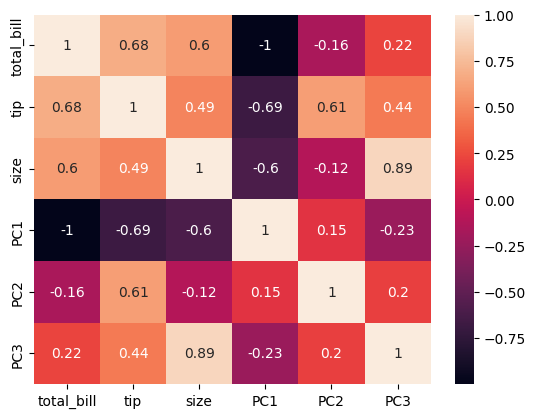

In [76]:
sns.heatmap(df.corr(),annot=True)